In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 36)

In [6]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [7]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [8]:
df.dropna(axis=0, inplace=True, subset=['children'])

In [9]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [10]:
df.dropna(axis=0, inplace=True, subset=['country'])

In [11]:
df['agent'].replace(np.nan, 'No agent', inplace=True)

In [12]:
df['company'].replace(np.nan, 'No company', inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

visualization of stays

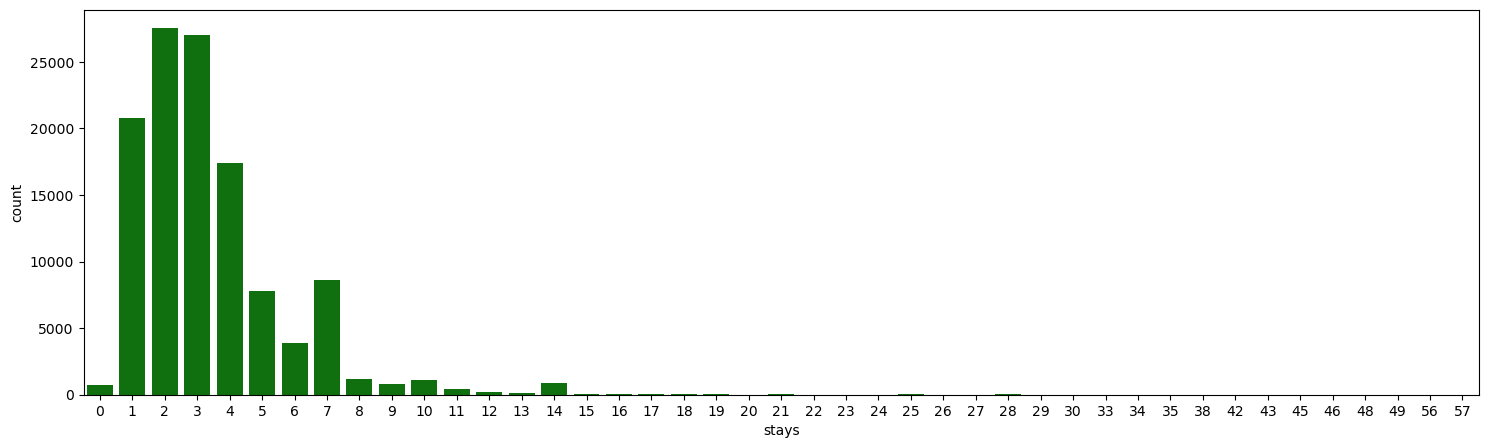

In [14]:
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='g')
plt.show()

 percentage of people who canceled their reservastion

([<matplotlib.patches.Wedge at 0x22329c7a770>,
 [Text(-1.0113763824572926, -0.4325711652521476, 'Not Canceled'),
  Text(1.0113763419570527, 0.432571259944036, 'Canceled')],
 [Text(-0.551659844976705, -0.23594790831935322, '62.9%'),
  Text(0.5516598228856651, 0.23594795996947415, '37.1%')])

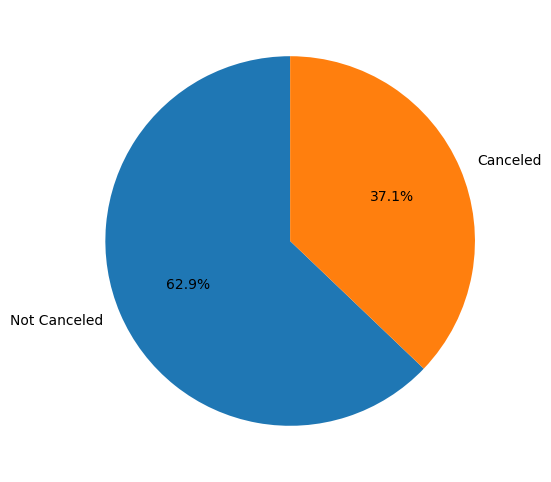

In [15]:
num_can= df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

In [20]:
df = df[df['adr']<5000]

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


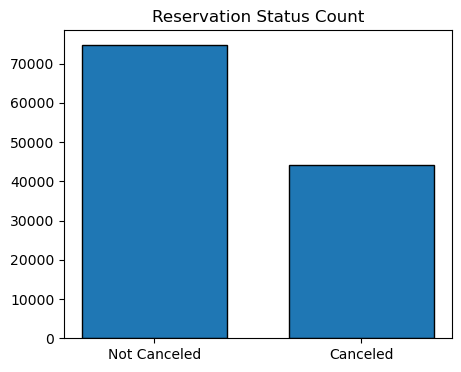

In [21]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'], df['is_canceled'].value_counts(),edgecolor = 'k', width = 0.7)
plt.show()

distribution plot of the rate actually paid

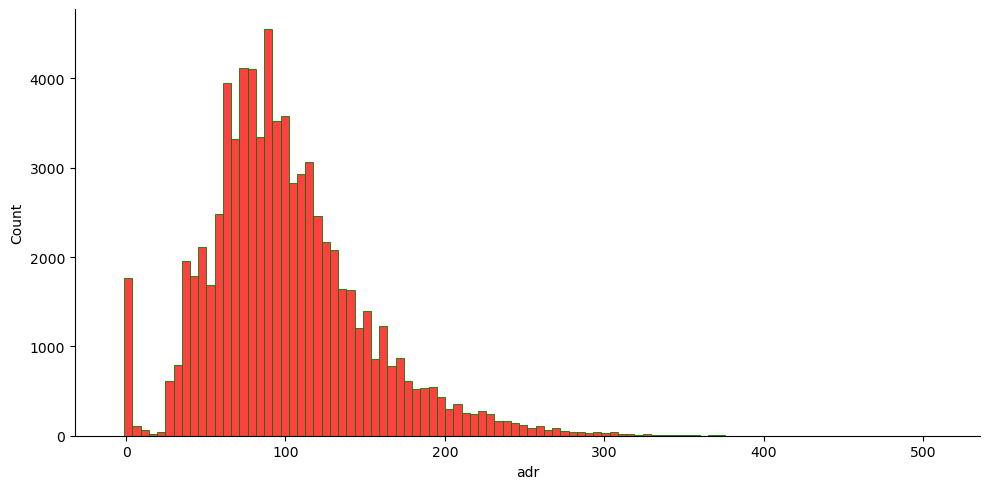

In [16]:
sns.displot(data = df[df['is_canceled'] == 0], x = 'adr', height = 5, aspect= 2, bins = 100, color = 'r', edgecolor = 'g')

KDE Plot

Text(0.5, 1.0, 'Rates paid for canceled and not canceled reservations')

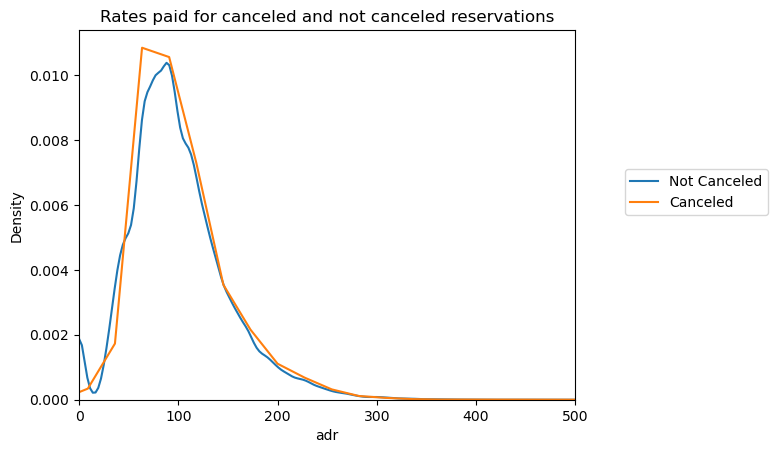

In [17]:
plt.xlim(0, 500)
sns.kdeplot(data = df[df['is_canceled'] == 0], x = 'adr', label = 'Not Canceled') 
sns.kdeplot(data = df[df['is_canceled'] == 1], x = 'adr', label = 'Canceled')
plt.legend(loc=(1.1,0.5))
plt.title('Rates paid for canceled and not canceled reservations')

Bar Plot

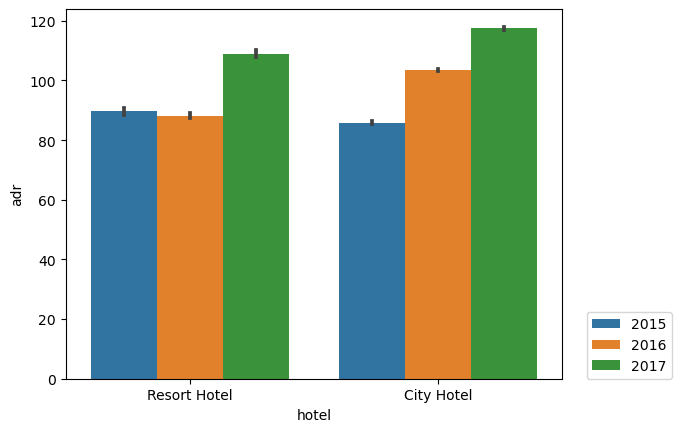

In [18]:
sns.barplot(data = df, x = 'hotel', y = 'adr', hue ='arrival_date_year')
plt.legend(loc=(1.05, 0))

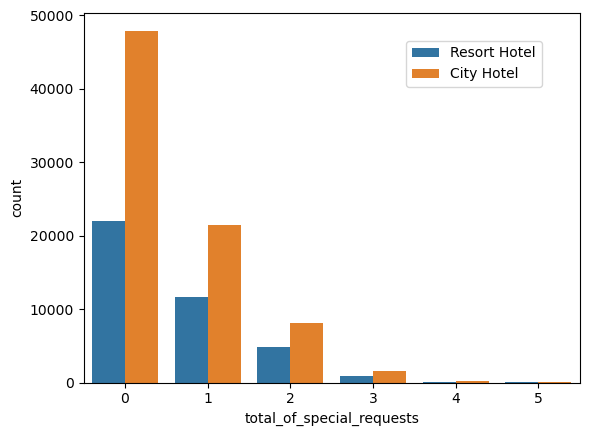

In [19]:
sns.countplot(data = df, x = 'total_of_special_requests', hue = 'hotel')
plt.legend(loc=(.65,.8))

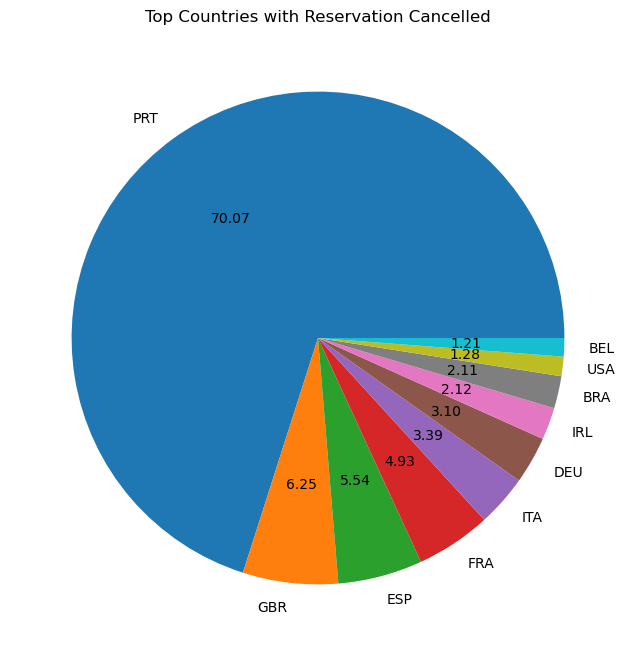

In [25]:
cancelled_data = df[df['is_canceled'] == 1]

# Count the occurrences of each country in the canceled reservations and select the top 10 countries
top_10_country = cancelled_data['country'].value_counts()[:10]

# Create a new figure for the pie chart with a size of 8x8 inches
plt.figure(figsize=(8, 8))

# Set the title for the pie chart
plt.title('Top Countries with Reservation Cancelled')

# Create a pie chart with the top 10 countries, displaying the percentage of each country's occurrence
# The `autopct` parameter specifies the format of the percentage values
# The `labels` parameter specifies the labels for each pie slice, which are the country names
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)

# Display the pie chart
plt.show()